## **Santa Dataset VGG16 with RMSProp Optimizer**

**Benedictus Bayu Pramudhito**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/My\ Drive/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Baseline CNN model



In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [ ]:
dataset_dir = '/content/'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


**Training with Baseline CNN Layer**

In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
6/6 [==============================] - 58s 10s/step - loss: 0.7556 - accuracy: 0.5619 - val_loss: 0.9726 - val_accuracy: 0.5346
Epoch 2/75
6/6 [==============================] - 55s 9s/step - loss: 0.7086 - accuracy: 0.6360 - val_loss: 0.7464 - val_accuracy: 0.5000
Epoch 3/75
6/6 [==============================] - 55s 9s/step - loss: 0.6396 - accuracy: 0.6088 - val_loss: 0.6043 - val_accuracy: 0.6885
Epoch 4/75
6/6 [==============================] - 57s 9s/step - loss: 0.5360 - accuracy: 0.7085 - val_loss: 0.5039 - val_accuracy: 0.7654
Epoch 5/75
6/6 [==============================] - 58s 10s/step - loss: 0.4315 - accuracy: 0.8021 - val_loss: 0.5141 - val_accuracy: 0.7385
Epoch 6/75
6/6 [==============================] - 57s 9s/step - loss: 0.3648 - accuracy: 0.8625 - val_loss: 0.4240 - val_accuracy: 0.8308
Epoch 7/75
6/6 [==============================] - 56s 9s/step - loss: 0.3060 - accuracy: 0.904

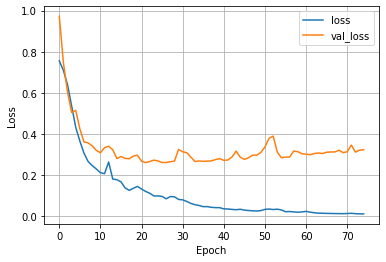

In [ ]:
plot_loss(history_base_model)

### **Fine Tuning Method**

**Image Augmentation**

In [10]:
dataset_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_augmented_iteration = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(224, 224))
test_augmented_iteration = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(224, 224))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


**Fine Tuning with RMSProp Optimizer**

In [21]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout

In [22]:
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = RMSprop(learning_rate=0.0001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
history_model = fine_tuned_model.fit_generator(train_augmented_iteration, steps_per_epoch=len(train_augmented_iteration), validation_data=test_augmented_iteration, validation_steps=len(test_augmented_iteration), epochs=50)

Epoch 1/50
6/6 [==============================] - 24s 4s/step - loss: 1.1515 - accuracy: 0.7145 - val_loss: 0.2460 - val_accuracy: 0.9231
Epoch 2/50
6/6 [==============================] - 20s 3s/step - loss: 0.2580 - accuracy: 0.9184 - val_loss: 0.2839 - val_accuracy: 0.9115
Epoch 3/50
6/6 [==============================] - 22s 4s/step - loss: 0.3281 - accuracy: 0.9079 - val_loss: 0.1821 - val_accuracy: 0.9577
Epoch 4/50
6/6 [==============================] - 22s 4s/step - loss: 0.1717 - accuracy: 0.9592 - val_loss: 0.2307 - val_accuracy: 0.9423
Epoch 5/50
6/6 [==============================] - 19s 3s/step - loss: 0.1454 - accuracy: 0.9517 - val_loss: 0.2341 - val_accuracy: 0.9423
Epoch 6/50
6/6 [==============================] - 18s 3s/step - loss: 0.1285 - accuracy: 0.9562 - val_loss: 0.2155 - val_accuracy: 0.9538
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 0.0810 - accuracy: 0.9773 - val_loss: 0.2009 - val_accuracy: 0.9654
Epoch 8/50
6/6 [==================

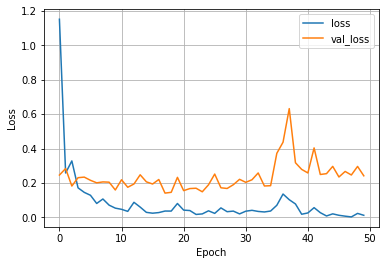

In [24]:
plot_loss(history_model)

In [27]:
import pandas as pd

history_dataframe = pd.DataFrame(history_model.history)
history_dataframe['epoch'] = history_model.epoch

In [30]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
17,0.036891,0.987915,0.141145,0.973077,17
18,0.036678,0.981873,0.145738,0.969231,18
23,0.020238,0.990937,0.148840,0.973077,23
20,0.042236,0.987915,0.155499,0.973077,20
9,0.053793,0.978852,0.159293,0.965385,9
21,0.039815,0.989426,0.167536,0.965385,21
27,0.033119,0.984894,0.168054,0.973077,27
22,0.017203,0.993958,0.169443,0.965385,22
26,0.055166,0.980363,0.172033,0.969231,26
11,0.034990,0.989426,0.175037,0.969231,11


In [32]:
history_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
28,0.036508,0.986405,0.189898,0.976923,28
49,0.012204,0.995468,0.241711,0.973077,49
33,0.031564,0.984894,0.182563,0.973077,33
31,0.041111,0.986405,0.218613,0.973077,31
27,0.033119,0.984894,0.168054,0.973077,27
23,0.020238,0.990937,0.148840,0.973077,23
20,0.042236,0.987915,0.155499,0.973077,20
17,0.036891,0.987915,0.141145,0.973077,17
42,0.027452,0.990937,0.249323,0.973077,42
47,0.002768,0.998489,0.246404,0.973077,47


**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Nilai val_accuracy tertinggi pada model berada pada epoch 28 yaitu sebesar 0.976923 akan tetapi kita harus tinjau juga berdasarkan val_lossnya. Berdasarkan grafik epoch terhadap loss pada arsitektur CNN dengan vgg16 dan image augmentation, terlihat bahwa garis loss dan val_loss nya cenderung stabil dengan epoch 50 namun terjadi peningkatan pada epoch 34 hingga mulai turun kembali pada epoch 36. Terlihat adanya perbedaan jarak antara loss dan val_lossnya dengan 50 epoch yang tidak begitu besar yang berarti model yang kita buat ini cukup bagus. Nilai val_loss terendah diperoleh saat epochnya sekitar 17, dimana diperoleh val_loss: 0.141145 dan val_accuracy: 0.973077, sedikit lebih kecil dibanding val_accuracy tertingginya

## **Santa Dataset with VGG19 Using RMSProp Optimizer**

In [7]:
from tensorflow.keras.applications import vgg16, vgg19
from tensorflow.keras.layers import Dropout

In [12]:
vgg_conv = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(4096, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = RMSprop(learning_rate=0.0001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

80142336/80134624 [==============================] - 2s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              102764544 
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4097      
Total params: 122,793,025
Trainable params: 102,768,641
Non-trainable params: 20,024,384
_________________________________________________________________


In [13]:
history_vgg19_model = fine_tuned_model.fit_generator(train_augmented_iteration, steps_per_epoch=len(train_augmented_iteration), validation_data=test_augmented_iteration, validation_steps=len(test_augmented_iteration), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
6/6 [==============================] - 28s 5s/step - loss: 4.8237 - accuracy: 0.5121 - val_loss: 0.5455 - val_accuracy: 0.8308
Epoch 2/50
6/6 [==============================] - 24s 4s/step - loss: 1.1412 - accuracy: 0.8051 - val_loss: 1.3638 - val_accuracy: 0.8269
Epoch 3/50
6/6 [==============================] - 26s 4s/step - loss: 0.7242 - accuracy: 0.8882 - val_loss: 0.4438 - val_accuracy: 0.9192
Epoch 4/50
6/6 [==============================] - 23s 4s/step - loss: 0.6753 - accuracy: 0.8973 - val_loss: 0.3593 - val_accuracy: 0.9346
Epoch 5/50
6/6 [==============================] - 27s 5s/step - loss: 0.5546 - accuracy: 0.9079 - val_loss: 0.6570 - val_accuracy: 0.9077
Epoch 6/50
6/6 [==============================] - 23s 4s/step - loss: 0.4149 - accuracy: 0.9215 - val_loss: 0.4343 - val_accuracy: 0.9154
Epoch 7/50
6/6 [==============================] - 23s 4s/step - loss: 0.3658 - accuracy: 0.9260 

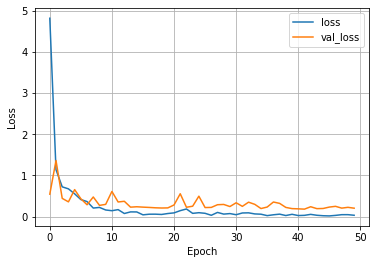

In [14]:
plot_loss(history_vgg19_model)

In [18]:
history_dataframe = pd.DataFrame(history_vgg19_model.history)
history_dataframe['epoch'] = history_vgg19_model.epoch

In [19]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
41,0.031350,0.992447,0.182093,0.961538,41
40,0.026082,0.986405,0.189445,0.965385,40
43,0.032924,0.984894,0.194026,0.969231,43
39,0.056392,0.978852,0.194843,0.965385,39
34,0.058871,0.984894,0.196375,0.957692,34
44,0.021797,0.989426,0.197914,0.957692,44
49,0.033016,0.992447,0.205108,0.957692,49
47,0.047311,0.984894,0.206819,0.953846,47
18,0.052740,0.986405,0.209485,0.957692,18
19,0.075357,0.974320,0.212189,0.953846,19


In [20]:
history_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
43,0.032924,0.984894,0.194026,0.969231,43
40,0.026082,0.986405,0.189445,0.965385,40
26,0.032761,0.989426,0.223894,0.965385,26
29,0.074030,0.977341,0.245334,0.965385,29
39,0.056392,0.978852,0.194843,0.965385,39
41,0.031350,0.992447,0.182093,0.961538,41
27,0.102205,0.969788,0.289355,0.961538,27
38,0.026559,0.993958,0.223965,0.961538,38
25,0.080565,0.972810,0.220768,0.961538,25
42,0.054952,0.984894,0.240449,0.961538,42


**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Nilai val_accuracy tertinggi pada model berada pada epoch 43 yaitu sebesar 0.969231 akan tetapi kita harus tinjau juga berdasarkan val_lossnya. Berdasarkan grafik epoch terhadap loss pada arsitektur CNN dengan vgg19 dan image augmentation, terlihat bahwa garis loss nya menurun drastis pada epoch 3 hingga epoch 15 dan sudah stabil hingga epoch 50 dan val_loss nya juga cenderung stabil dengan epoch 50 walaupun diawal sempat terjadi peningkatan. Terlihat adanya perbedaan jarak antara loss dan val_lossnya dengan 50 epoch yang kecil yang berarti model yang kita buat ini bagus. Nilai val_loss terendah diperoleh saat epochnya sekitar 17, dimana diperoleh val_loss: 0.182093 dan val_accuracy: 0.961538, sedikit lebih kecil dibanding val_accuracy tertingginya